<a href="https://colab.research.google.com/github/mualal/notebooks-source/blob/master/6_pressure.ipynb">    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Открыть и запустить в Google Colaboratory"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# функция для расчёта давления на расстоянии r от скважины
# по-умолчанию заданы параметры в промысловых единицах для варианта 16
def radial_pressure_calc(
    r: float,  # м
    p_w=71,  # атм
    q=65,  # м3/сут
    mu=3,  # сПз
    k=9000,  # мДарси
    h=13,  # м
    r_w=0.1,  # м
    s=0  # безразмерный
) -> float:
    return p_w + 18.41 * q * mu / (k * h) * (np.log(r / r_w) + s)

In [3]:
x1 = 73  # м
x2 = 83  # м

print(
    f'Давление на расстоянии x1={x1} м составляет примерно {round(radial_pressure_calc(x1), 4)} атм\n'
    f'Давление на расстоянии x2={x2} м составляет примерно {round(radial_pressure_calc(x2), 4)} атм'
)

Давление на расстоянии x1=73 м составляет примерно 71.2023 атм
Давление на расстоянии x2=83 м составляет примерно 71.2062 атм


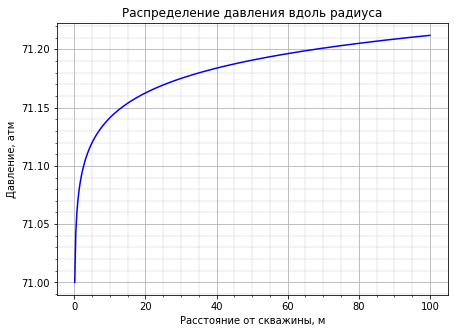

In [4]:
# абсциссы точек на графике (расстояния от скважины в метрах)
x = np.arange(
    start=0.1,
    stop=100,
    step=0.3
)

# построение графика
plt.figure(figsize=(7, 5))
plt.title('Распределение давления вдоль радиуса')
plt.xlabel('Расстояние от скважины, м')
plt.ylabel('Давление, атм')
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle='--', linewidth=0.4)
plt.plot(x, radial_pressure_calc(x), c='blue')
plt.savefig(os.path.join('images', 'pressure_distribution.jpg'), dpi=300)
plt.show()

In [5]:
# функция для расчёта дебита жидкости
def production_rate_calc(
    k=9000,  # мДарси
    h=13,  # м
    p_e=71.2,  # атм
    p_w=71,  # атм
    r_e=70,  # м
    r_w=0.1,  # м
    mu=3,  # сПз
    s=0  # безразмерный
):
    return (k * h * (p_e - p_w)) / (18.41 * mu * (np.log(r_e / r_w) + s))


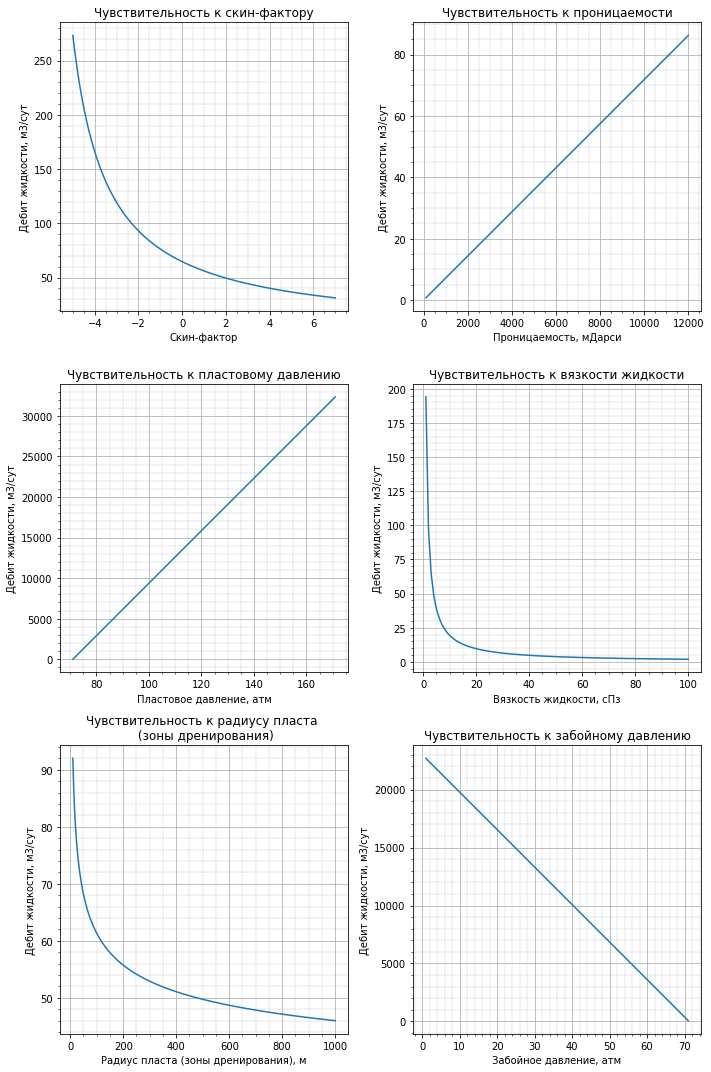

In [6]:
# анализ чувствительности

s_arr = np.linspace(-5, 7, 100)
k_arr = np.linspace(100,12000,1000)
p_e_arr = np.linspace(71, 171, 100)
mu_arr = np.linspace(1, 100, 100)
r_e_arr = np.linspace(10, 1000, 1000)
p_w_arr = np.linspace(1, 71, 100)

plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.plot(s_arr, [production_rate_calc(s=s) for s in s_arr])
plt.title('Чувствительность к скин-фактору')
plt.xlabel('Скин-фактор')
plt.ylabel('Дебит жидкости, м3/сут')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle='--', linewidth=0.4)

plt.subplot(3,2,2)
plt.plot(k_arr, [production_rate_calc(k=k) for k in k_arr])
plt.title('Чувствительность к проницаемости')
plt.xlabel('Проницаемость, мДарси')
plt.ylabel('Дебит жидкости, м3/сут')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle='--', linewidth=0.4)

plt.subplot(3,2,3)
plt.plot(p_e_arr, [production_rate_calc(p_e=p_e) for p_e in p_e_arr])
plt.title('Чувствительность к пластовому давлению')
plt.xlabel('Пластовое давление, атм')
plt.ylabel('Дебит жидкости, м3/сут')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle='--', linewidth=0.4)

plt.subplot(3,2,4)
plt.plot(mu_arr, [production_rate_calc(mu=mu) for mu in mu_arr])
plt.title('Чувствительность к вязкости жидкости')
plt.xlabel('Вязкость жидкости, сПз')
plt.ylabel('Дебит жидкости, м3/сут')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle='--', linewidth=0.4)

plt.subplot(3,2,5)
plt.plot(r_e_arr, [production_rate_calc(r_e=r_e) for r_e in r_e_arr])
plt.title('Чувствительность к радиусу пласта \n (зоны дренирования)')
plt.xlabel('Радиус пласта (зоны дренирования), м')
plt.ylabel('Дебит жидкости, м3/сут')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle='--', linewidth=0.4)

plt.subplot(3,2,6)
plt.plot(p_w_arr, [production_rate_calc(p_w=p_w) for p_w in p_w_arr])
plt.title('Чувствительность к забойному давлению')
plt.xlabel('Забойное давление, атм')
plt.ylabel('Дебит жидкости, м3/сут')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle='--', linewidth=0.4)

plt.tight_layout()
plt.show()